In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv("C:/Users/hp/Documents/data/carprices.csv")
df.head()

,Car Model,Mileage,sell price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


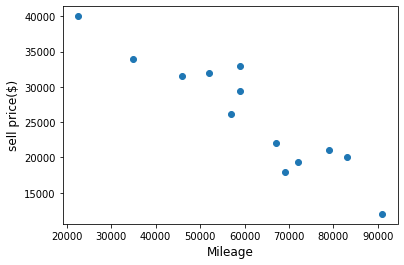

In [3]:
plt.scatter(df["Mileage"], df["sell price($)"])
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("sell price($)", fontsize=12)
plt.show()

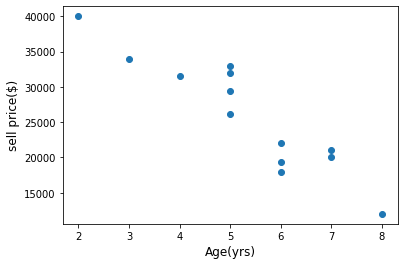

In [4]:
plt.scatter(df["Age(yrs)"], df["sell price($)"])
plt.xlabel("Age(yrs)", fontsize=12)
plt.ylabel("sell price($)", fontsize=12)
plt.show()

In [5]:
dummies = pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [6]:
df_merge = pd.concat([df, dummies], axis="columns")
df_merge

,Car Model,Mileage,sell price($),Age(yrs),Audi A5,BMW X5,Mercedez
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez,67000,22000,6,0,0,1


In [7]:
df_merge.drop(["Car Model","Mercedez"], axis=1, inplace=True)

In [8]:
df_merge.head()

,Mileage,sell price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


In [9]:
x = df_merge.drop(["sell price($)"], axis=1)
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [10]:
y = df["sell price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: sell price($), dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [13]:
len(x_test)

3

In [14]:
len(x_train)

10

In [15]:
len(y_test)

3

In [16]:
len(y_test)

3

In [17]:
x_test

,Mileage,Age(yrs),Audi A5,BMW X5
3,22500,2,0,1
7,72000,6,1,0
11,79000,7,0,0


In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict price of a Mercedez benz that is 4years old with Mileage 45000 

In [20]:
reg.predict([[45000,4,0,0]])

array([36871.03077103])

### Predict price of a BMW X5  that is 7years old with Mileage 86000 

In [21]:
reg.predict([[86000,7,0,1]])

array([12537.34643735])

### The accuracy of the model

In [22]:
reg.score(x_test,y_test)

0.8675370464375713